In [1]:
# Carefully modify the below two string variables. Ensure there are no typos.

student_id = "11093712" # set this to your student ID

student_mail = "matthew.crean@student.manchester.ac.uk" # your email address

# Coursework 2

This coursework test contains several Jupyter Notebook cells with the comment `# TODO`. This is where you type the code for your solutions. Do not alter any of the other cells. 

It is good practice to include markdown cells explaining your work, but in this test they won't be marked. 

Here are some tips:

* **Do not alter the names of the predefined variables and functions,** such as `h_best_L1`, `astro_scores`, etc. The (return) values of these variables and functions will inform the marking. Renaming them and failure to follow the problem description will result in loss of marks.

* **Ensure that functions *return* values, not merely print them.** Each function should have at least one occurance of the `return` keyword, followed by a variable of the type required by the question.  

* **Do not hard-code any solution variables.** All problems must be solved by computer code using the data in the provided CSV file. For example, do *not* simply define a variable `astro_scores = 1234` with a fixed value. Your Jupyter Notebook should produce results with a modified data file that has the same format but different numerical (or NaN) values.

* **Avoid inefficient computations.** Ensure that each cell can be run in about 20 seconds on a modern laptop. Long-running cells will be timed out which will result in loss of marks.

* **Submit this test as a single .ipynb file using Blackboard.** You can simply keep the name `test2-2025.ipynb`. There is a basic testing code at the end that verifies some parts of the coursework.

   <span style="color:blue; font-weight:bold">Strict deadline: Monday, 24th of March 2025, at 1pm. There are no automatic extensions.</span>

### Note on independent work

You need to complete all coursework tests independently on your own, but you are allowed to use online resources and all course notes and exercise solutions. The course notes from chapters 1 to 5 contain all that is required to solve the below problems. You are not allowed to ask other humans for help. In particular, you are not allowed to send, give, or receive code or markdown content to/from classmates and others.

The University Guidelines for Academic Malpractice apply: http://documents.manchester.ac.uk/display.aspx?DocID=2870

**Important: Even if you are the originator of the work** (and not the one who copied), the University Guidelines require that you will be equally responsible for this case of academic malpractice and may lose all coursework marks (or even be assigned 0 marks for the course).

# Start of test

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd

## Problem 1a

Consider a supervised learning problem on a $d$-dimensional feature space $\mathcal{X}=\mathbb{Z}^d$ with integer coordinates, and a $J$-dimensional label space $\mathcal{Y} = \mathbb{R}^J$ (notation as in the semester 1 lecture notes). Assume that the loss function is the $L^1$ loss, i.e., $L(y,y') = \| y - y' \|_1$ with the 1-norm. Further assume that we are given data pairs $(x_1,y_1),(x_2,y_2),\ldots,(x_N,y_N) \in \mathcal{X}\times \mathcal{Y}$.

Now consider the best $L^1$ hypothesis given the data, i.e., the optimal hypothesis $h$ that minimizes the empirical error 
$$
\hat{R}(h) := \frac{1}{N}\sum_{n=1}^N L(y_n, h(x_n)).
$$ 
Implement a function `h_best_L1(x, X, Y)` that evaluates this best hypothesis for a given feature point `x`.  

The inputs of `h_best_L1(x, X, Y)` are

* a $d$-dimensional NumPy vector `x` which can always be assumed (without checking) to be among the feature vectors $\{x_1,\ldots,x_N\}$

* an $N\times d$ NumPy matrix `X` of the features

* an $N\times J$ NumPy matrix `Y` of the labels

The function returns a $J$-dimensional NumPy vector. 

All data types are standard floats, even if we only ever use integer values in `x` and `X`.

In [3]:
h_best_L1 = None

def h_best_L1(x, X, Y):
    index = np.where((X==x).all(axis=1))
    return Y[index[0]]

## Problem 1b

Write a function `best_L1_err(X, Y)` that, given data as in Problem 1a, returns the empirical error of the best $L^1$ hypothesis as a floating point number.

(The function `best_L1_err` may of course make use of `h_best_L1` by calling it.)

In [4]:
best_L1_err = None

def best_L1_err(X,Y):
    Rh = 0
    for i in range(X.shape[0]):
        Rh += np.sum(abs(Y[i:i+1,:] - h_best_L1(X[i:i+1,:], X, Y)))/X.shape[0]
    return Rh

## Problem 2a

Using only plain Python with no modules except NumPy, write a function `my_knn(x, X, k)` that takes as inputs a $d$-dimensional NumPy vector `x` and an $N\times d$ NumPy array `X` (each row corresponding to a data point). The parameter `k` is a positive integer. The function returns a Python list with the indices of $k$ nearest neighbours to `x` in `X`, where distance between two $d$-dimensional vectors $\mathbf u = [u_0,u_1,\ldots,u_{d-1}]$ and $\mathbf v = [v_0,v_1,\ldots,v_{d-1}]$ is measured as

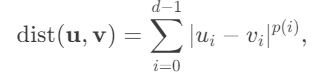

with $p(i)$ taking the value $2$ for even $i$, and $1$ for odd $i$. 

The indices in the returned list should be ordered by nondecreasing distance of the data points to `x`, i.e., `X[my_knn(x, X, 1)[0],:]` is a data point closest to `x`. If there are multiple points in `X` with the exact same distance to `x`, the returned indices should be increasing.

**Example:** Assume that $k=4$ and the nearest neighbours to `x` are `X[7,:], X[2,:], X[9,:], X[0,:]` with distances $1.2,5.3,3.1,1.2$, respectively. Then the returned list should be `[0, 7, 9, 2]`.

In [5]:
my_knn = None

def evenodd(i):
    if i % 2 == 0:
        return 2
    return 1

def dist(u,v):
    return np.sum(np.abs(u - v) ** np.array(np.vectorize(evenodd)(np.arange(len(u)))))

def my_knn(x, X, k):
    y = np.apply_along_axis(dist, 1, X, x)
    return list(np.argsort(y)[:k])

## Problem 2b

Using only plain Python with no modules except NumPy, write a function `my_knn_predict(x, X, k, y)` that takes the same inputs as the function in Problem 2a, as well as a Python list `y` with `N` elements (the labels of each data point). The function then returns a label (an element of `y`) that appeared most frequently among the $k$ nearest neighbors. If there are multiple labels with the same number of votes, a label with an associated feature closest to `x` is preferred. 

The function `my_knn_predict` may of course make use of `my_knn` by calling it.

**Example:** Assume that $k=5$ and the labels of the nearest neighbours sorted by nondecreasing distance from `x` are `['c', 'b', 'a', 'a', 'b']`. In this case `b` should be returned, as `b` is one of the most frequent labels, and there is a data point labelled `b` which is potentially closer to `x` than the next data point labelled `a`. 

In [6]:
my_knn_predict = None

def most_frequent(List):
    z = np.unique(List, return_counts=True)
    return z[0][max(z[1]) == z[1]]

def my_knn_predict(x, X, k, y):
    y = np.array(y)
    y_knn = y[my_knn(x, X, k)]
    mfy_knn = most_frequent(y_knn)
    if len(mfy_knn) == 1:
        return mfy_knn[0]
    a = np.in1d(y_knn, mfy_knn)
    return y_knn[a][0]

## Problem 3a

We will now work with some astronomical observation data used to classify celestial objects. Some missing values are given as $-9999$, and those are removed first.

In [7]:
# do not change code in this cell
astro = pd.read_csv("_datasets/star_classification.csv")
astro.replace(-9999, np.nan, inplace=True)
astro.dropna(inplace=True)
astro.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


We only retain the columns named *u*, *g*, *r*, *i*, *z*, and *redshift*, and let `y` be the column *class*. We then split into training and testing data as usual.

In [8]:
# do not change code in this cell
X = astro[["u", "g", "r", "i", "z", "redshift"]]
y = astro["class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, 
    test_size=0.2,
    shuffle=True,
    random_state=3383 
)

For each value $k=2,3,\ldots,6$, train a kNN classifier with $k$ neighbors, in a pipeline with z-score standardization, on the training set. Find the accuracy score of the trained model on the test. Produce a series `astro_scores` indexed by values of $k$ whose values are the accuracy scores.

In [9]:
astro_scores = None

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

astro_scores_list = []

for k in range(2,7):
    knn = KNeighborsClassifier(n_neighbors=k)
    pipe = Pipeline([
        ('scale', StandardScaler()),
        ('knn', knn)
    ])
    pipe.fit(X_train, y_train)
    acc = pipe.score(X_test, y_test)
    astro_scores_list.append(acc)

astro_scores = pd.Series(astro_scores_list, index=range(2,7))

## Problem 3b

Build your own sklearn Pipeline called `astro_pipe` that classifies the data from Problem 3a. You can use any scaling functions or models as part of this pipeline. Tune the parameters to achieve highest possible classification accuracy on test sets made up of 20% of the overall data.

There are two requirements:

* training and prediction times should be below 20 seconds, respectively, to avoid timeouts

* your final pipeline should be called `astro_pipe` and it should provide the usual `astro_pipe.fit()` and `astro_pipe.predict()` methods

In [10]:
astro_pipe = None

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier

astro_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', HistGradientBoostingClassifier(
        max_iter=300,
        max_depth=10,
        random_state=3383,
        max_leaf_nodes=30
    ))
])

# End of test

You can use the below tests to get an indication if part of your work returns the right data types.

In [11]:
try: 
    import re
    assert re.match(r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$', student_mail) and not 'firstname' in student_mail
    print("OKAY - student_mail appears to be valid")
except:
    print("WARN - student_mail could not be verified")

try: 
    assert callable(h_best_L1)
    print("OKAY - h_best_L1 should be a function")
except:
    print("FAIL - h_best_L1 should be a function")

import numpy as np
X = np.array([[1,2,3],[2,-3,4],[1,2,3],[2,2,2]])
Y = np.array([[1,2],[1,2],[3,4],[1,2]])
x = np.array([1,2,3])

try:
    val = h_best_L1(x, X, Y)
    assert val is not None
    print("OKAY - h_best_L1 returns a value")
except:
    print("FAIL - h_best_L1 does not return a value")

try: 
    assert callable(best_L1_err)
    print("OKAY - best_L1_err should be a function")
except:
    print("FAIL - best_L1_err should be a function")

try:
    val = best_L1_err(X, Y)
    assert val is not None
    print("OKAY - best_L1_err returns a value")
except:
    print("FAIL - best_L1_err does not return a value")

try: 
    assert callable(my_knn)
    print("OKAY - my_knn should be a function")
except:
    print("FAIL - my_knn should be a function")

try:
    val = my_knn(x, X, k=2)
    assert val is not None
    print("OKAY - my_knn returns a value")
except:
    print("FAIL - my_knn does not return a value")

try:
    val = my_knn_predict(x, X, 2, x)
    assert val is not None
    print("OKAY - my_knn_predict returns a value")
except:
    print("FAIL - my_knn_predict does not return a value")

try: 
    assert callable(my_knn_predict)
    print("OKAY - my_knn_predict should be a function")
except:
    print("FAIL - my_knn_predict should be a function")

try: 
    assert type(astro_scores) == pd.Series
    print("OKAY - astro_scores should be a pandas series")
except:
    print("FAIL - astro_scores should be a pandas series")

try: 
    assert callable(astro_pipe.fit) and callable(astro_pipe.predict)
    print("OKAY - astro_pipe should provide fit and predict methods")
except:
    print("FAIL - astro_pipe should provide fit and predict methods")

OKAY - student_mail appears to be valid
OKAY - h_best_L1 should be a function
OKAY - h_best_L1 returns a value
OKAY - best_L1_err should be a function
OKAY - best_L1_err returns a value
OKAY - my_knn should be a function
OKAY - my_knn returns a value
OKAY - my_knn_predict returns a value
OKAY - my_knn_predict should be a function
OKAY - astro_scores should be a pandas series
OKAY - astro_pipe should provide fit and predict methods
